<h1>Bengali Song Mood Predictor</h1>
This is a Deeplearning model trained on a custom made data set of Bengali Songs and predict if the sing is Happy or Sad.

In [3]:
#importing nesessary modules
import numpy as np
import pandas as pd
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Data Cleaning 
df=pd.read_csv('tr.csv')
zero_not_accepted = ['Mean','Standard Deviation']
for column in zero_not_accepted:
    df[column] = df[column].replace(0,np.NaN)
    mn = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN,mn)
df1=df.dropna()
print(df1)


                     Song Name  Loudness(in dB)        Mean   
0                    60's Love           -6.527   88.675421  \
1                 Baksho Bondi           -5.774   96.122737   
2                   Kichui Nei           -8.390   96.207487   
3     Amar Dehokhan (Official)           -8.665   97.333898   
4               Etota Valobasi          -10.423   98.707848   
..                         ...              ...         ...   
396  Shyama Naamer Laglo Aagun           -7.327  221.422615   
397       Byabharete Jana Gelo          -20.454  222.443373   
398       Moneri Basana Shyama          -17.359  223.136475   
399       Ganga Sindhu Narmada          -12.437  232.257369   
400           Oma Danuj Dalani          -15.445  237.196381   

     Standard Deviation  Valence  Danceability  KEY_NUM_VAL  Genre / Mood  
0             88.675421     0.39          0.46          5.0             0  
1             16.607486     0.28          0.42          6.0             0  
2             1

In [5]:
#Splitting Dataset
from sklearn.model_selection import train_test_split as spl
X=df1.iloc[:,1:7]
y=df1.iloc[:,7]
print(y)
X_train, X_test, y_train, y_test = spl(X,y,test_size=0.15,random_state=True)

0      0
1      0
2      0
3      0
4      0
      ..
396    1
397    1
398    1
399    1
400    1
Name: Genre / Mood, Length: 390, dtype: int64


In [10]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True)

ValueError: could not convert string to float: "60's Love"

<Figure size 700x700 with 0 Axes>

In [6]:
#Normalizing Data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler=MinMaxScaler()
#X_=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X.columns,index=None)
X_test=pd.DataFrame(scaler.transform(X_test),columns=X.columns,index=None)


In [13]:
print(type(X_train))
print(type(y_train))
print(type(X_test))
print(type(y_test))
print(X_test.tail(5))
print(y_test.tail(5))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
    Loudness(in dB)      Mean  Standard Deviation   Valence  Danceability   
54         0.529592  0.238383            0.307636  0.311828      0.631579  \
55         0.818262  0.092558            0.145875  0.376344      0.736842   
56         0.851016  0.551447            0.419288  0.526882      0.631579   
57         0.838450  0.127361            0.102714  0.086022      0.407895   
58         0.494199  0.350231            0.404319  0.666667      0.828947   

    KEY_NUM_VAL  
54     0.666667  
55     0.000000  
56     0.000000  
57     0.833333  
58     0.166667  
67     0
11     0
335    1
18     0
131    0
Name: Genre / Mood, dtype: int64


In [14]:
#Random Sampling as Validation data
X=df1.sample(100)
x_val=X.iloc[:,1:7]
y_val=X.iloc[:,7]
x_val=pd.DataFrame(scaler.fit_transform(x_val),columns=x_val.columns)
print(y_val)
print(x_val)



231    1
96     0
223    1
27     0
205    1
      ..
172    0
383    1
123    0
169    0
306    1
Name: Genre / Mood, Length: 100, dtype: int64
    Loudness(in dB)      Mean  Standard Deviation   Valence  Danceability   
0          0.803495  0.419155            0.176781  0.634146      0.354839  \
1          0.636769  0.706189            0.540893  0.402439      0.516129   
2          0.722105  0.310812            0.170591  0.573171      0.677419   
3          0.890472  0.177283            0.139321  0.475610      0.435484   
4          0.440777  0.050050            0.039289  0.365854      0.919355   
..              ...       ...                 ...       ...           ...   
95         0.288299  0.149684            0.107370  0.170732      0.709677   
96         0.393932  0.426764            0.324652  0.695122      0.548387   
97         0.550766  0.285214            0.282923  0.414634      0.225806   
98         0.626365  0.394953            0.302726  0.353659      0.338710   
99      

In [15]:
from keras import regularizers
from keras.optimizers import Adam
from keras.layers import Dropout
#defining the ann model
model=Sequential()
model.add(Dense(32,input_dim=6,kernel_initializer='normal',kernel_regularizer=regularizers.l2(.001),activation='relu'))
#adding neural layers
model.add(Dropout(0.25))
#diconnecting non essential connections of neurons
model.add(Dense(32,kernel_initializer='normal',kernel_regularizer=regularizers.l2(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(16,kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8,kernel_regularizer=regularizers.l1(.001),activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 8)                 1

In [16]:
#fitting the data
history=model.fit(X_train,y_train,validation_data=(x_val,y_val),epochs=300,batch_size=6)

Epoch 1/300
56/56 [==============================] - 2s 6ms/step - loss: 0.8017 - accuracy: 0.4955 - val_loss: 0.7851 - val_accuracy: 0.6400
Epoch 2/300
56/56 [==============================] - 0s 3ms/step - loss: 0.7738 - accuracy: 0.5438 - val_loss: 0.7551 - val_accuracy: 0.5400
Epoch 3/300
56/56 [==============================] - 0s 2ms/step - loss: 0.7439 - accuracy: 0.5347 - val_loss: 0.7228 - val_accuracy: 0.5500
Epoch 4/300
56/56 [==============================] - 0s 2ms/step - loss: 0.7298 - accuracy: 0.5861 - val_loss: 0.6992 - val_accuracy: 0.7200
Epoch 5/300
56/56 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.6193 - val_loss: 0.6574 - val_accuracy: 0.7100
Epoch 6/300
56/56 [==============================] - 0s 3ms/step - loss: 0.6791 - accuracy: 0.6918 - val_loss: 0.6453 - val_accuracy: 0.8000
Epoch 7/300
56/56 [==============================] - 0s 3ms/step - loss: 0.6587 - accuracy: 0.7009 - val_loss: 0.5979 - val_accuracy: 0.7200
Epoch 8/300
5

In [17]:
#predicting outcomes
y_pred=(model.predict(X_test)>.5).astype(int)

2/2 [==============================] - 0s 3ms/step


In [18]:
from sklearn.metrics import confusion_matrix,precision_score,matthews_corrcoef,jaccard_score
from sklearn.metrics import f1_score
cm1=confusion_matrix(y_test,y_pred)
print('Confusion Matrix :\n',cm1)
total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
sensitivity1=cm1[0,0]/(cm1[0,0]+cm1[0,1])
specificity1=cm1[1,1]/(cm1[1,0]+cm1[1,1])
jaccard=jaccard_score(y_test,y_pred)
mcc=matthews_corrcoef(y_test,y_pred)
f1_score=f1_score(y_test,y_pred)
prece=precision_score(y_test,y_pred)
print("Accuracy : " + str(accuracy1 ))
print("Sensitivity : "+str(sensitivity1))
print("Specificity : "+str(specificity1))
print("F1_Score : "+ str(f1_score))
print("Precision : " + str(prece))
print("Jaccard Score : " + str(jaccard))
print("Matthew's Corelation Coeff : " + str(mcc))

Confusion Matrix :
 [[21  4]
 [ 4 30]]
Accuracy : 0.864406779661017
Sensitivity : 0.84
Specificity : 0.8823529411764706
F1_Score : 0.8823529411764706
Precision : 0.8823529411764706
Jaccard Score : 0.7894736842105263
Matthew's Corelation Coeff : 0.7223529411764706


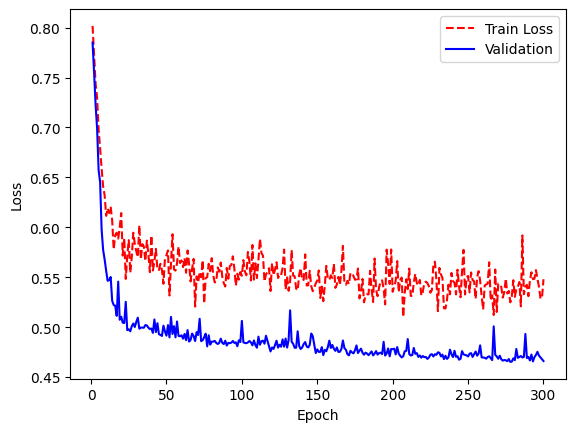

In [19]:
train_loss=history.history['loss']
test_loss=history.history['val_loss']
epoch_ct=range(1,len(train_loss)+1)
plt.plot(epoch_ct,train_loss,'r--')
plt.plot(epoch_ct,test_loss,'b-')
plt.legend(['Train Loss','Validation'])
plt.xlabel("Epoch")
plt.ylabel('Loss')
plt.show()

11/11 [==============================] - 0s 2ms/step


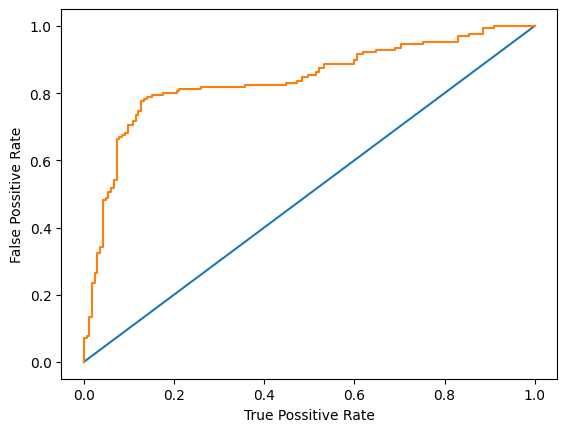

In [20]:
from sklearn.metrics import roc_curve
y_pred_keras=model.predict(X_train).ravel()
fpr,tpr,thresholds=roc_curve(y_train,y_pred_keras)
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('True Possitive Rate')
plt.ylabel('False Possitive Rate')
plt.show()


In [8]:
input_array = np.array([-3.82,153.128807,26.869872,0.92,0.71,1]).reshape(1, -1)
array_used = pd.DataFrame(scaler.transform(input_array),columns=X_test.columns,index=None)
pred1 = (model.predict(array_used)>.5).astype(int)
print(pred1)

if pred1 == 0:
    print("Sad")
else:
    print("Happy")

c:\Users\wriki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


NameError: name 'model' is not defined

In [9]:

import keras.models
import tensorflow as tf
#model.save('my_model')
new_model=tf.keras.models.load_model("my_model")
new_model.evaluate(X_test,y_test,verbose=2)
pr= (new_model.predict(array_used)>.5).astype(int)
print(pr)



2/2 - 0s - loss: 0.4521 - accuracy: 0.8644 - 292ms/epoch - 146ms/step
1/1 [==============================] - 0s 160ms/step
[[1]]


In [51]:
input_array = np.array([-13.248,312.716878,58.116833,0.19,0.26,2]).reshape(1, -1)
array_used = pd.DataFrame(scaler.transform(input_array),columns=X_test.columns,index=None)
pred1 = (new_model.predict(array_used)>.5).astype(int)
print(pred1)

if pred1 == 0:
    print("Sad")
else:
    print("Happy")

1/1 [==============================] - 0s 20ms/step
[[0]]
Sad


c:\Users\wriki\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [52]:
import pickle
file_name = open('sacler_model.sav','wb')
pickle.dump(scaler,file=file_name)

In [53]:
print(X_test.head())

   Loudness(in dB)      Mean  Standard Deviation   Valence  Danceability   
0         0.413319  0.654616            0.573634  0.451613      0.394737  \
1         0.440838  0.087325            0.086451  0.666667      0.552632   
2         0.477780  0.362489            0.367257  0.720430      0.657895   
3         0.888000  0.232752            0.207651  0.774194      0.526316   
4         0.777298  0.412426            0.454912  0.612903      0.578947   

   KEY_NUM_VAL  
0     0.666667  
1     0.666667  
2     0.666667  
3     0.166667  
4     0.666667  


In [ ]:
import pickle
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler, f)

